<b> T5 Data Science Bootcamp</b>



## Medical Charges Prediction

by:Batoul Alosaimi ,Norah Alqahtani and Shroaq Almutairi

### Table of Contents:


<li><a id='Introduction'> Introduction</a></li>
<li><a id='Assumptions'> Assumptions</a></li>
<li><a id='1. Gather data'> 1.Gather data</a></li>
<li><a id=' 2.Preparing the Data'>2. Preparing the Data </a></li>
<li><a id='3.Exploratory Data Analysis'>3.Exploratory Data Analysis </a></li>
<li><a id='4. Building the Model'>4. Building the Model</a></li>

### Introduction

As the lead data scientist at NSB company we’ve had an opportunity to work with ACME Insurance Inc. that offers affordable health insurance to thousands of customers all over the United States., we’re tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits, and region of residence.
Estimates from our system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, we will explain why our system outputs a certain prediction.
From this web page
https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41 we’re going to gather data using beautiful soup and selenium in python to be able after that to apply linear regression to help us predicting the annual medical expenditure for new customers.


#### Question/need:

1. are any relevant corralection between the ratio of multiple quantitative variables; such as age/bmi vs charges/children?

2. which are the top 10 states with the highest charges(based on this sample data)? 

3. Can we plot the regions with oldest population and higest charges?

### Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests

from urllib.request import urlopen

/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1 .Gather data

##### 1.1 US Health Insurance Web Scraping

In [2]:
url = 'https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41#file-medical_cost-csv'

requests = requests.get(url)

In [3]:
page = requests.text
page

'\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-d4XC7S3D2O/G0TvZjbbtWpDgCLyqvsXCX4K0DUJVfSwpV8ySOlchU43C/9mcyyHtCnczq4eoCl/e3fzC9uXxGA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-7785c2ed2dc3d8efc6d13bd98db6ed5a.css" /><link crossorigin="anonymous" media="all" integrity="sha512-uEgC6AoKK1gK/XX3HlE4+2pdmfa3CUGgk9GV+7h+h0dtALsvueFLg+18JnwLD1axmkp744Iz

In [4]:
soup = bs(page, "html5lib")

soup.prettify()

'<!DOCTYPE html>\n<html data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <link href="https://github.githubassets.com" rel="dns-prefetch"/>\n  <link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>\n  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>\n  <link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>\n  <link href="https://avatars.githubusercontent.com" rel="preconnect"/>\n  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-7785c2ed2dc3d8efc6d13bd98db6ed5a.css" integrity="sha512-d4XC7S3D2O/G0TvZjbbtWpDgCLyqvsXCX4K0DUJVfSwpV8ySOlchU43C/9mcyyHtCnczq4eoCl/e3fzC9uXxGA==" media="all" rel="stylesheet"/>\n  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-b84802e80a0a2b580afd75f71e5138fb.css" integrity="sha512-uEgC

In [5]:
mytable = soup.find_all('table',{'class':'js-csv-data csv-data js-file-line-container'})
mytable

[<table class="js-csv-data csv-data js-file-line-container">
       <thead>
         <tr class="js-file-line" id="file-medical_cost-csv-LC1">
           <td class="blob-num js-line-number" data-line-number="1" id="file-medical_cost-csv-L1"></td>
             <th>age</th>
             <th>sex</th>
             <th>bmi</th>
             <th>children</th>
             <th>smoker</th>
             <th>region</th>
             <th>charges</th>
         </tr>
       </thead>
       <tbody>
           <tr class="js-file-line" id="file-medical_cost-csv-LC2">
             <td class="blob-num js-line-number" data-line-number="2" id="file-medical_cost-csv-L2"></td>
               <td>19</td>
               <td>female</td>
               <td>27.9</td>
               <td>0</td>
               <td>yes</td>
               <td>southwest</td>
               <td>16884.924</td>
           </tr>
           <tr class="js-file-line" id="file-medical_cost-csv-LC3">
             <td class="blob-num js-line-nu

In [6]:
trs = None
for item in mytable:
    trs = item.find_all("tr")
    print('-----')

-----


In [7]:
len(mytable)

1

In [8]:
len(trs)

1339

In [9]:
trs

[<tr class="js-file-line" id="file-medical_cost-csv-LC1">
           <td class="blob-num js-line-number" data-line-number="1" id="file-medical_cost-csv-L1"></td>
             <th>age</th>
             <th>sex</th>
             <th>bmi</th>
             <th>children</th>
             <th>smoker</th>
             <th>region</th>
             <th>charges</th>
         </tr>, <tr class="js-file-line" id="file-medical_cost-csv-LC2">
             <td class="blob-num js-line-number" data-line-number="2" id="file-medical_cost-csv-L2"></td>
               <td>19</td>
               <td>female</td>
               <td>27.9</td>
               <td>0</td>
               <td>yes</td>
               <td>southwest</td>
               <td>16884.924</td>
           </tr>, <tr class="js-file-line" id="file-medical_cost-csv-LC3">
             <td class="blob-num js-line-number" data-line-number="3" id="file-medical_cost-csv-L3"></td>
               <td>18</td>
               <td>male</td>
               <

In [10]:
 trs[0]

<tr class="js-file-line" id="file-medical_cost-csv-LC1">
          <td class="blob-num js-line-number" data-line-number="1" id="file-medical_cost-csv-L1"></td>
            <th>age</th>
            <th>sex</th>
            <th>bmi</th>
            <th>children</th>
            <th>smoker</th>
            <th>region</th>
            <th>charges</th>
        </tr>

In [11]:
age, gender, bmi, children, smoker, region, charges = [], [],[], [], [], [], []
for row in trs[1:]:
    l = row.text.split()
    age.append(l[0])
    gender.append(l[1])
    bmi.append(l[2])
    children.append(l[3])
    smoker.append(l[4])
    region.append(l[5])
    charges.append(l[6])

In [12]:
dictionary = {'age': age, 
             'gender': gender, 'bmi': bmi, 'children': children,
              'smoker': smoker, 'region': region, 'charges': charges,
             }
dictionary

{'age': ['19',
  '18',
  '28',
  '33',
  '32',
  '31',
  '46',
  '37',
  '37',
  '60',
  '25',
  '62',
  '23',
  '56',
  '27',
  '19',
  '52',
  '23',
  '56',
  '30',
  '60',
  '30',
  '18',
  '34',
  '37',
  '59',
  '63',
  '55',
  '23',
  '31',
  '22',
  '18',
  '19',
  '63',
  '28',
  '19',
  '62',
  '26',
  '35',
  '60',
  '24',
  '31',
  '41',
  '37',
  '38',
  '55',
  '18',
  '28',
  '60',
  '36',
  '18',
  '21',
  '48',
  '36',
  '40',
  '58',
  '58',
  '18',
  '53',
  '34',
  '43',
  '25',
  '64',
  '28',
  '20',
  '19',
  '61',
  '40',
  '40',
  '28',
  '27',
  '31',
  '53',
  '58',
  '44',
  '57',
  '29',
  '21',
  '22',
  '41',
  '31',
  '45',
  '22',
  '48',
  '37',
  '45',
  '57',
  '56',
  '46',
  '55',
  '21',
  '53',
  '59',
  '35',
  '64',
  '28',
  '54',
  '55',
  '56',
  '38',
  '41',
  '30',
  '18',
  '61',
  '34',
  '20',
  '19',
  '26',
  '29',
  '63',
  '54',
  '55',
  '37',
  '21',
  '52',
  '60',
  '58',
  '29',
  '49',
  '37',
  '44',
  '18',
  '20',
  '44',
 

In [13]:
insurence_df = pd.DataFrame(dictionary)
insurence_df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.8,0,no,southwest,2007.945


##### 1.2 Save DataFrame in csv file

In [14]:
insurence_df.to_csv("medical_charge.csv")

#### 1.3 load data 

In [15]:
insurence_df=pd.read_csv("medical_charge.csv",index_col=0)
insurence_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###  2. Preparing the Data

In [16]:
insurence_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
insurence_df.shape

(1338, 7)

In [18]:
insurence_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


> we can see that the data is made up of two forms: Numerical and Categorical.

#### 2.1 Check nulls

In [19]:
insurence_df.isnull().sum()


age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 2.2 Drop Duplicates

In [20]:
# Count duplicate in a DataFrame
insurence_df.duplicated().sum() 

1

In [21]:
#Remove duplicates from the original DataFrame
insurence_df.drop_duplicates(inplace=True)
insurence_df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
insurence_df.duplicated().sum()#Check for Remove duplicates , 0 no duplicates.


0

#### 2.3 Converting Categorical Features to Numerical


In [34]:
clean_data = {'gender': {'male' : 0 , 'female' : 1} ,
              'smoker': {'no': 0 , 'yes' : 1},
               'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = insurence_df.copy()
data_copy.replace(clean_data, inplace=True)

In [35]:
data_copy.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [36]:
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [37]:
data_copy.describe()

,age,gender,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### 3. Exploratory Data Analysis

After preparing our data, we are ready for the next step. We need to pick the important ‘features’ that will have an impact on the target variable. The best way to do that is to try and find the correlation(s) between the different features.

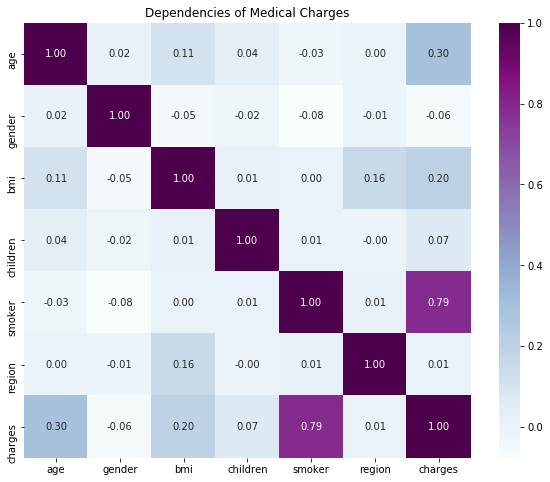

In [38]:
corr =data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./Cor')
plt.show()

> Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

#### 3.1 Age vs Charge

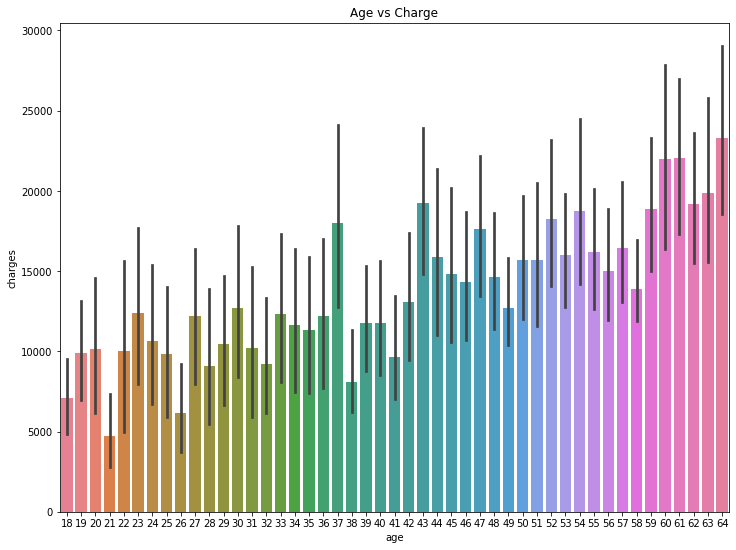

In [39]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')
plt.savefig('./AgevsCharges')


#### 3.2 Region vs Charge

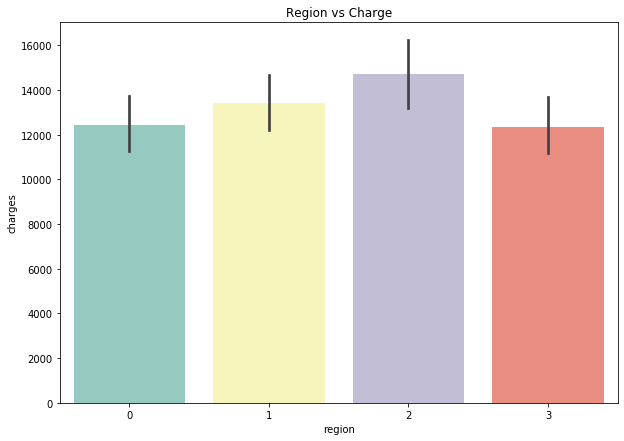

In [40]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

> Note: northwest is 0 , northeast is 1, southeast is 2 , southwest is 3

#### 3.3 BMI VS Charge

Text(0.5, 1.0, 'BMI VS Charge')

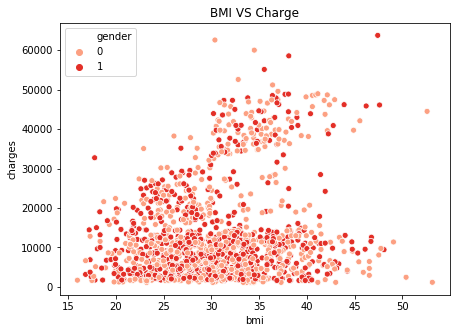

In [41]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='gender',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

#### 3.4 Smoker vs Charge

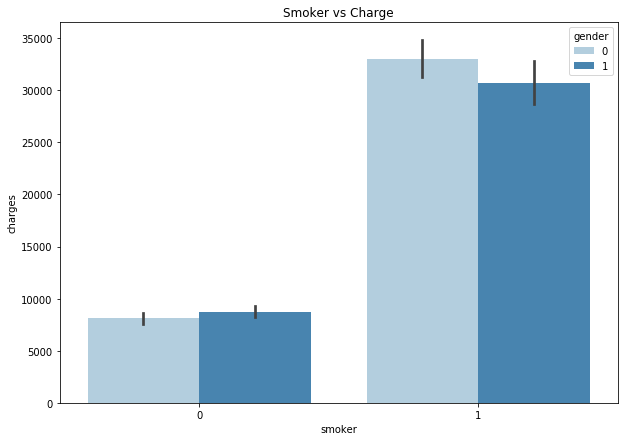

In [43]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='gender')

#### 3.5 gender vs Charges

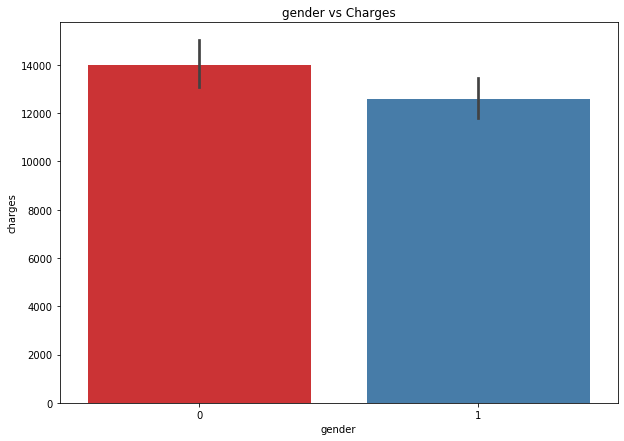

In [46]:
plt.figure(figsize=(10,7))
plt.title('gender vs Charges')
sns.barplot(x='gender',y='charges',data=data_copy,palette='Set1')

###  4. Building the Model
